In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Importando dados para as análises

In [2]:
df = pd.read_csv('quiqua.csv', sep=";")

In [3]:
df.head()

,Renda,Estado,Escolaridade,Anos_Estudo,Estado_Civil,Gasto
0,5948,MG,Superior,9,Solteiro,3000
1,5870,MG,Superior,8,Solteiro,2600
2,5710,GO,Superior,9,Casado,2700
3,5660,RJ,Médio,7,Casado,3100
4,5351,SP,Superior,8,Solteiro,2000


# Frequencias

In [4]:
#Absoluta
pd.value_counts(df['Estado'])

SP    5
MG    4
RJ    4
GO    3
TO    3
RS    2
Name: Estado, dtype: int64

In [5]:
#Relativa
(pd.value_counts(df['Estado'])/len(df))

SP    0.238095
MG    0.190476
RJ    0.190476
GO    0.142857
TO    0.142857
RS    0.095238
Name: Estado, dtype: float64

In [6]:
pd.crosstab(df['Estado'],df['Escolaridade']).apply(lambda r: r/r.sum(), axis=1) #total por linhas

Escolaridade,Fundamental,Médio,Superior
Estado,,,
GO,0.666667,0.000000,0.333333
MG,0.500000,0.000000,0.500000
RJ,0.500000,0.500000,0.000000
RS,0.500000,0.000000,0.500000
SP,0.000000,0.800000,0.200000
TO,0.333333,0.333333,0.333333


In [7]:
pd.crosstab(df['Estado'],df['Escolaridade']).apply(lambda r: r/r.sum(), axis=0) #total por colunas

Escolaridade,Fundamental,Médio,Superior
Estado,,,
GO,0.250,0.000000,0.166667
MG,0.250,0.000000,0.333333
RJ,0.250,0.285714,0.000000
RS,0.125,0.000000,0.166667
SP,0.000,0.571429,0.166667
TO,0.125,0.142857,0.166667


# Medidas - Univariado

In [8]:
import statistics as st
print(df['Renda'].mean()) #calculo da média
print(st.median(df['Renda'])) #mediana
print(st.stdev(df['Renda'])) #desvio-padrao amostral
print(st.stdev(df['Renda'])/df['Renda'].mean()) #coeficiente de variacao - desvio padrao dividido pela media

3852.5238095238096
4454
1751.1335648387196
0.45454191886102013


In [9]:
df['Renda'].quantile([.1,.5,.75,0.9]) #quantis

0.10    1452.0
0.50    4454.0
0.75    5312.0
0.90    5710.0
Name: Renda, dtype: float64

In [10]:
np.average(df['Renda'], weights=df['Anos_Estudo']) #média de renda ponderada por anos de estudo

4559.628318584071

* Skewness é uma medida de assimetria
    - Skewness com valor zero é uma distribuição perfeitamente simétrica
    - Quanto mais próximo de +1 ou -1, mais assimétrico é a distribuição
    - Valores positivos significam assimetria a direita, valores negativos são assimetria a esquerda

In [11]:
print(df['Gasto'].skew())

0.644278311823383


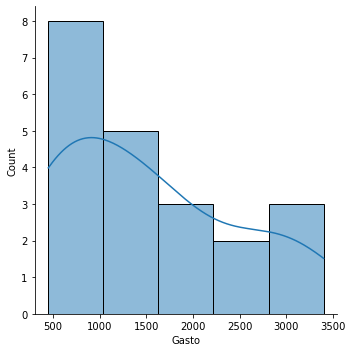

In [12]:
sns.displot(df["Gasto"], bins=5, kde=True) #grafico representando o valor calculado acima

# Medidas - Multivariado

* Associação entre variáveis quantitativas

In [13]:
#Correlação de spearman entre colunas quantitativas
df[['Renda','Anos_Estudo']].corr('spearman')

,Renda,Anos_Estudo
Renda,1.000000,0.927955
Anos_Estudo,0.927955,1.000000


In [14]:
#Correlação de pearson entre colunas quantitativas
df[['Renda','Anos_Estudo']].corr('pearson')

,Renda,Anos_Estudo
Renda,1.000000,0.912758
Anos_Estudo,0.912758,1.000000


* Associação entre variáveis qualitativas

In [15]:
from scipy.stats import chi2_contingency

In [16]:
#Calcular qui-quadrado e vcramer, medidas de associação entre variáveis categóricas. Quanto maior o vcramer, maior a associação
# entre as variáveis
CATVAR = df.select_dtypes(include=['object']).columns.tolist() #cria uma lista das variaveis categoricas
chimap = pd.DataFrame(columns=['Var1','Var2','xsq','pvalue','vcramer']) #cria dataframe para inserir valores do chisquare
for x in CATVAR:
    for y in CATVAR:
        if x != y:
            chi = df.pivot_table('Renda',index= [x],columns= [y] ,aggfunc = 'count')
            chi=chi.replace(np.nan,0)
            xsq,pvalue,dof,expected=chi2_contingency(chi)
            a = min(len(df[x].unique()),len(df[y].unique()))
            b = len(df[x])
            vcramer = (xsq/(b*(a-1)))**(1/2)
            chimap = chimap.append({'Var1' : x, 'Var2' : y, 'xsq': xsq, 'pvalue': pvalue, 'vcramer':vcramer}, ignore_index=True)
chimap = chimap.sort_values(by = 'vcramer', ascending = False)
chimap
#Observa-se que o maior vcramer é entre as variáveis de Estado e Estado Civil, com p-valor significativo, menor que 0,05.

,Var1,Var2,xsq,pvalue,vcramer
1,Estado,Estado_Civil,14.986364,0.010421,0.844770
4,Estado_Civil,Estado,14.986364,0.010421,0.844770
0,Estado,Escolaridade,11.820833,0.297226,0.530517
2,Escolaridade,Estado,11.820833,0.297226,0.530517
3,Escolaridade,Estado_Civil,1.742045,0.418523,0.288018
5,Estado_Civil,Escolaridade,1.742045,0.418523,0.288018


In [17]:
freq = pd.crosstab(df['Estado'], df['Estado_Civil']).apply(lambda r: r/r.sum()*100, axis=1)

In [18]:
freq #Pela tabela de frequência percentual cruzada observa-se a diferença % a depender da combinação das observações

Estado_Civil,Casado,Solteiro
Estado,,
GO,100.0,0.0
MG,25.0,75.0
RJ,25.0,75.0
RS,100.0,0.0
SP,0.0,100.0
TO,100.0,0.0


Text(0, 0.5, '%')

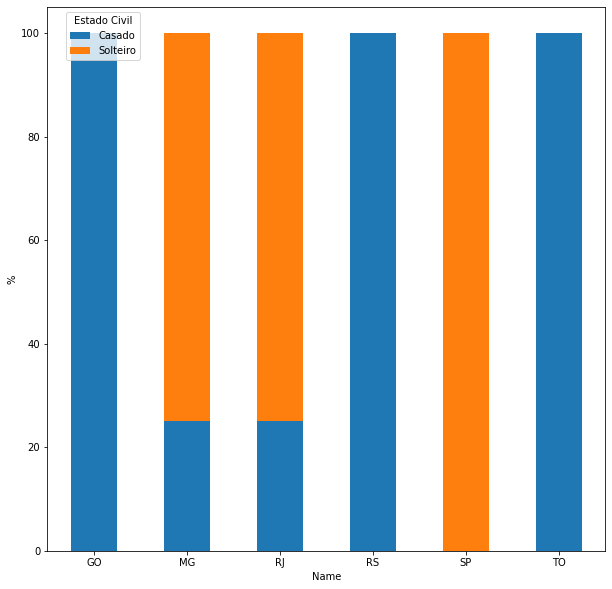

In [19]:
ax_1 = freq.plot.bar(figsize=(10,10),stacked=True, rot=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Estado Civil")
plt.xlabel('Name')
plt.ylabel('%') #gráfico que ilustra visualmente a diferença citada acima

* Associação entre variável quanti e qualitativa
    * R2 mensura o quanto da variabilidade de uma variável quanti conseguimos explicar pela inserção da variável quali
    * Representa o quanto da variância dos dados conseguimos reduzir segmentando pela variável quali
    * R2 varia entre 0 e 1, quanto mais próximo a 1, mais associado estão as variáveis

In [20]:
#Cria lista de variaveis qualitativas e quantitativas
CATVAR = df.select_dtypes(include=['object']).columns.tolist()
NUMVAR = df.select_dtypes(include=['float64','int64']).columns.tolist()

In [21]:
r2 = pd.DataFrame(columns=['VarQuanti','VarQuali','var*n / n_total','R2'])
for z in NUMVAR:
    for x in CATVAR:
        dfr = df[x].value_counts().reset_index()
        f = 0
        a1 = 0
        for y in range(len(dfr)):
            a = dfr.iloc[y,1]
            a1 = a1 + a
            c = (df[df[x] == dfr.iloc[y,0]])
            e = (c[z].var())*a
            f = f + e
        f = f/a1
        r2_calc = 1 - (f/df[z].var())
        r2 = r2.append({'VarQuanti' : z, 'VarQuali' : x,'var*n / n_total' : f, 'R2' : r2_calc}, ignore_index=True)
r2 = r2.sort_values(by = 'R2', ascending = False)
r2 #Observa-se que há um R2 relativamente alto para as variáveis Renda e Escolaridade

,VarQuanti,VarQuali,var*n / n_total,R2
1,Renda,Escolaridade,1.279860e+06,0.582627
4,Anos_Estudo,Escolaridade,3.138322e+00,0.497677
7,Gasto,Escolaridade,6.843639e+05,0.257807
6,Gasto,Estado,9.251190e+05,-0.003292
8,Gasto,Estado_Civil,9.353466e+05,-0.014384
5,Anos_Estudo,Estado_Civil,6.492063e+00,-0.039126
2,Renda,Estado_Civil,3.211468e+06,-0.047285
3,Anos_Estudo,Estado,7.436508e+00,-0.190295
0,Renda,Estado,3.937980e+06,-0.284207


<AxesSubplot:xlabel='Escolaridade', ylabel='Renda'>

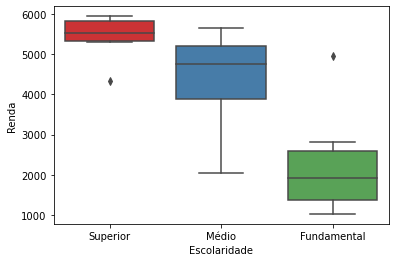

In [22]:
sns.boxplot(x="Escolaridade", y="Renda", data=df, palette="Set1")
#O boxplot de Escolaridade x Renda representa a métrica acima, observa-se que segmentando por Escolaridade é possível 
# visualizar as diferenças da variável Renda, em que cada grupo tem uma distribuição bem caracterizada

<AxesSubplot:xlabel='Escolaridade', ylabel='Gasto'>

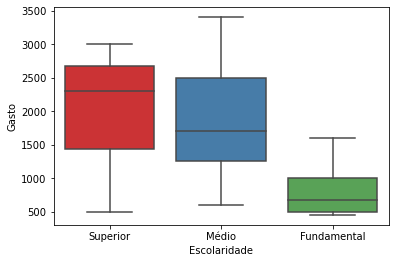

In [23]:
sns.boxplot(x="Escolaridade", y="Gasto", data=df, palette="Set1")
# Ja entre Escolaridade e Gasto, que possui um R2 menor, não há essa associação tão forte

# Tabelas Cruzadas

In [24]:
df.pivot_table('Renda',index=["Estado","Estado_Civil"], aggfunc='mean',margins=True) 
#media da renda por estado e estado_civil

Renda
Estado Estado_Civil             
GO     Casado        3327.333333
MG     Casado        4950.000000
       Solteiro      4323.333333
RJ     Casado        5660.000000
       Solteiro      3202.333333
RS     Casado        3401.000000
SP     Solteiro      4223.600000
TO     Casado        3271.333333
All                  3852.523810

In [25]:
df.pivot_table('Renda',index=["Estado"],columns=['Escolaridade'], aggfunc='count',margins=True) 
#quantas observacoes por estado e escolaridade, se colocar dropna = True, exclui os NaN

Escolaridade,Fundamental,Médio,Superior,All
Estado,,,,
GO,2.0,NaN,1.0,3
MG,2.0,NaN,2.0,4
RJ,2.0,2.0,NaN,4
RS,1.0,NaN,1.0,2
SP,NaN,4.0,1.0,5
TO,1.0,1.0,1.0,3
All,8.0,7.0,6.0,21


In [26]:
df.pivot_table('Renda',index=["Estado","Estado_Civil"], columns=['Escolaridade'] ,aggfunc='mean',margins=True)
#media da renda por estado, estado_civil e escolaridade

Escolaridade         Fundamental        Médio     Superior          All
Estado Estado_Civil                                                    
GO     Casado           2136.000          NaN  5710.000000  3327.333333
MG     Casado           4950.000          NaN          NaN  4950.000000
       Solteiro         1152.000          NaN  5909.000000  4323.333333
RJ     Casado                NaN  5660.000000          NaN  5660.000000
       Solteiro         2420.000  4767.000000          NaN  3202.333333
RS     Casado           1494.000          NaN  5308.000000  3401.000000
SP     Solteiro              NaN  3941.750000  5351.000000  4223.600000
TO     Casado           1023.000  4454.000000  4337.000000  3271.333333
All                     2216.375  4378.285714  5420.666667  3852.523810

In [27]:
#transformando a tabela cruzada em df, usando reset.index()
df2 = (df.pivot_table('Renda',index=["Estado","Estado_Civil"], columns=['Escolaridade'] ,aggfunc='mean',margins=True)).reset_index()

In [28]:
df2

Escolaridade,Estado,Estado_Civil,Fundamental,Médio,Superior,All
0,GO,Casado,2136.000,NaN,5710.000000,3327.333333
1,MG,Casado,4950.000,NaN,NaN,4950.000000
2,MG,Solteiro,1152.000,NaN,5909.000000,4323.333333
3,RJ,Casado,NaN,5660.000000,NaN,5660.000000
4,RJ,Solteiro,2420.000,4767.000000,NaN,3202.333333
5,RS,Casado,1494.000,NaN,5308.000000,3401.000000
6,SP,Solteiro,NaN,3941.750000,5351.000000,4223.600000
7,TO,Casado,1023.000,4454.000000,4337.000000,3271.333333
8,All,,2216.375,4378.285714,5420.666667,3852.523810
